In [39]:
from bs4 import BeautifulSoup
import requests

url = r"https://www.worldometers.info/world-population/population-by-country/"
page = requests.get(url)
soup = BeautifulSoup(page.text,"html")

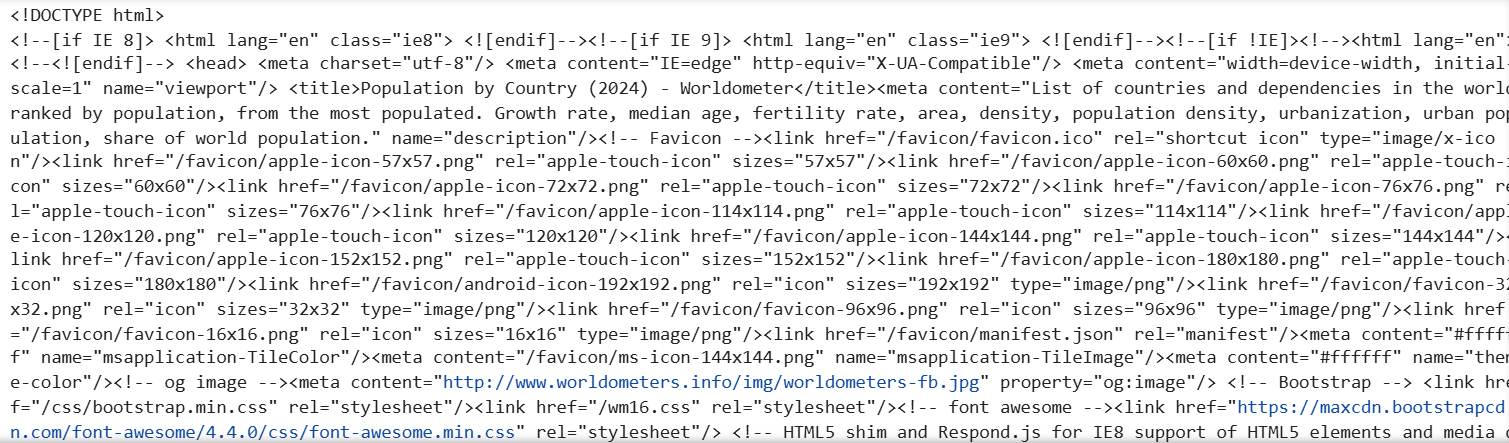

In [42]:
#Let's identify the table:
table = soup.find("table")

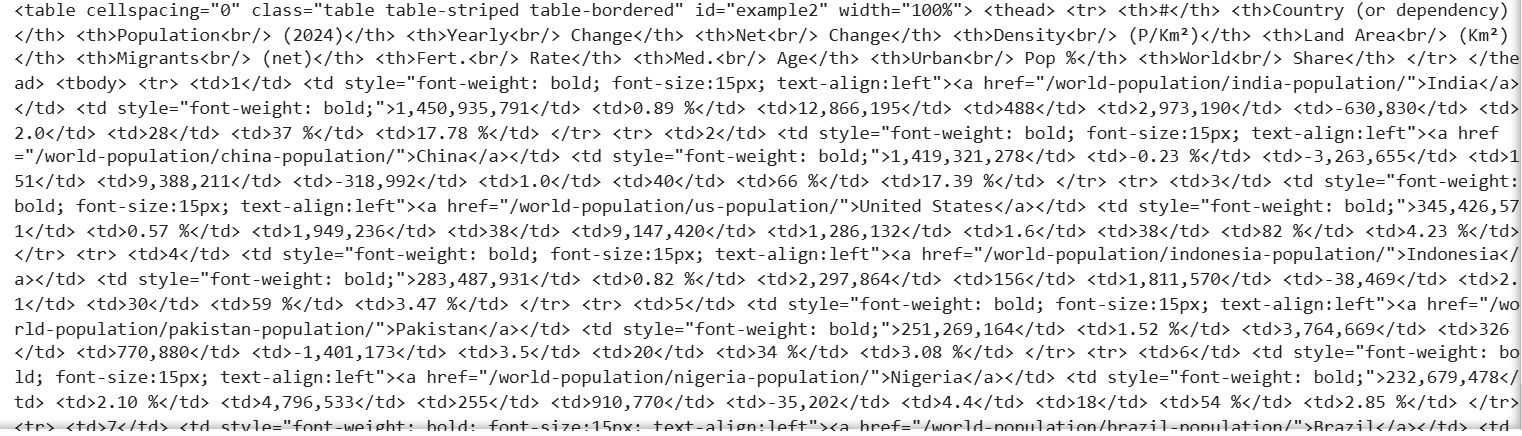

In [46]:
#let's identify the columns of the table, that are under the "th" tag :
table.find_all("th")

[<th>#</th>,
 <th>Country (or dependency)</th>,
 <th>Population<br/> (2024)</th>,
 <th>Yearly<br/> Change</th>,
 <th>Net<br/> Change</th>,
 <th>Density<br/> (P/Km²)</th>,
 <th>Land Area<br/> (Km²)</th>,
 <th>Migrants<br/> (net)</th>,
 <th>Fert.<br/> Rate</th>,
 <th>Med.<br/> Age</th>,
 <th>Urban<br/> Pop %</th>,
 <th>World<br/> Share</th>]

In [48]:
world_columns = table.find_all("th")

In [50]:
#We need to put the columns into a list to be able to retreive only the texts without the tags:
world_colulmns_titles = [columns.text for columns in world_columns]
print(world_colulmns_titles)

['#', 'Country (or dependency)', 'Population (2024)', 'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share']


In [53]:
#Let's put the information into a Pandas data frame:

import pandas as pd

df = pd.DataFrame(columns = world_colulmns_titles)

df

,#,Country (or dependency),Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share


In [86]:
rows = table.find_all("tr")
print(rows[:5])

[<tr> <th>#</th> <th>Country (or dependency)</th> <th>Population<br/> (2024)</th> <th>Yearly<br/> Change</th> <th>Net<br/> Change</th> <th>Density<br/> (P/Km²)</th> <th>Land Area<br/> (Km²)</th> <th>Migrants<br/> (net)</th> <th>Fert.<br/> Rate</th> <th>Med.<br/> Age</th> <th>Urban<br/> Pop %</th> <th>World<br/> Share</th> </tr>, <tr> <td>1</td> <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/india-population/">India</a></td> <td style="font-weight: bold;">1,450,935,791</td> <td>0.89 %</td> <td>12,866,195</td> <td>488</td> <td>2,973,190</td> <td>-630,830</td> <td>2.0</td> <td>28</td> <td>37 %</td> <td>17.78 %</td> </tr>, <tr> <td>2</td> <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/china-population/">China</a></td> <td style="font-weight: bold;">1,419,321,278</td> <td>-0.23 %</td> <td>-3,263,655</td> <td>151</td> <td>9,388,211</td> <td>-318,992</td> <td>1.0</td> <td>40</td> <td>66 %</td> <td>17.39 %</t

In [67]:
world_rows = table.find_all("tr")

In [69]:
#Now let's identify the data that are in the cells of the rows:
for row in world_rows:
    row_data = row.find_all("td")
    individual_row_data = [data.text for data in row_data]

print(individual_row_data)

['234', 'Holy See', '496', '0.00 %', '0', '1,240', '0', '18', '1.0', '59', 'N.A.', '0.00 %']


In [71]:
#this code allowed us to retreive the last row.
#Let's find a way to save each row gradually in the Pandas data frame:

for row in world_rows[1:]:
    row_data = row.find_all("td")
    individual_row_data = [data.text for data in row_data]

    length = len(df)
    df.loc[length] = individual_row_data

df

,#,Country (or dependency),Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,"1,450,935,791",0.89 %,"12,866,195",488,"2,973,190","-630,830",2.0,28,37 %,17.78 %
1,2,China,"1,419,321,278",-0.23 %,"-3,263,655",151,"9,388,211","-318,992",1.0,40,66 %,17.39 %
2,3,United States,"345,426,571",0.57 %,"1,949,236",38,"9,147,420","1,286,132",1.6,38,82 %,4.23 %
3,4,Indonesia,"283,487,931",0.82 %,"2,297,864",156,"1,811,570","-38,469",2.1,30,59 %,3.47 %
4,5,Pakistan,"251,269,164",1.52 %,"3,764,669",326,"770,880","-1,401,173",3.5,20,34 %,3.08 %
...,...,...,...,...,...,...,...,...,...,...,...,...
463,230,Montserrat,"4,389",-0.70 %,-31,44,100,-7,1.4,42,11 %,0.00 %
464,231,Falkland Islands,"3,470",-0.20 %,-7,0,"12,170",-13,1.7,42,68 %,0.00 %
465,232,Tokelau,"2,506",4.55 %,109,251,10,72,2.6,27,0 %,0.00 %
466,233,Niue,"1,819",0.11 %,2,7,260,10,2.5,36,44 %,0.00 %


In [73]:
#Let's save this to a CSV file:
df.to_csv(r"C:\Users\User\OneDrive\Documents\Portfolio Projects\World_Population_Scraped.csv", index = False)

In [77]:
#CSV File Results Overview

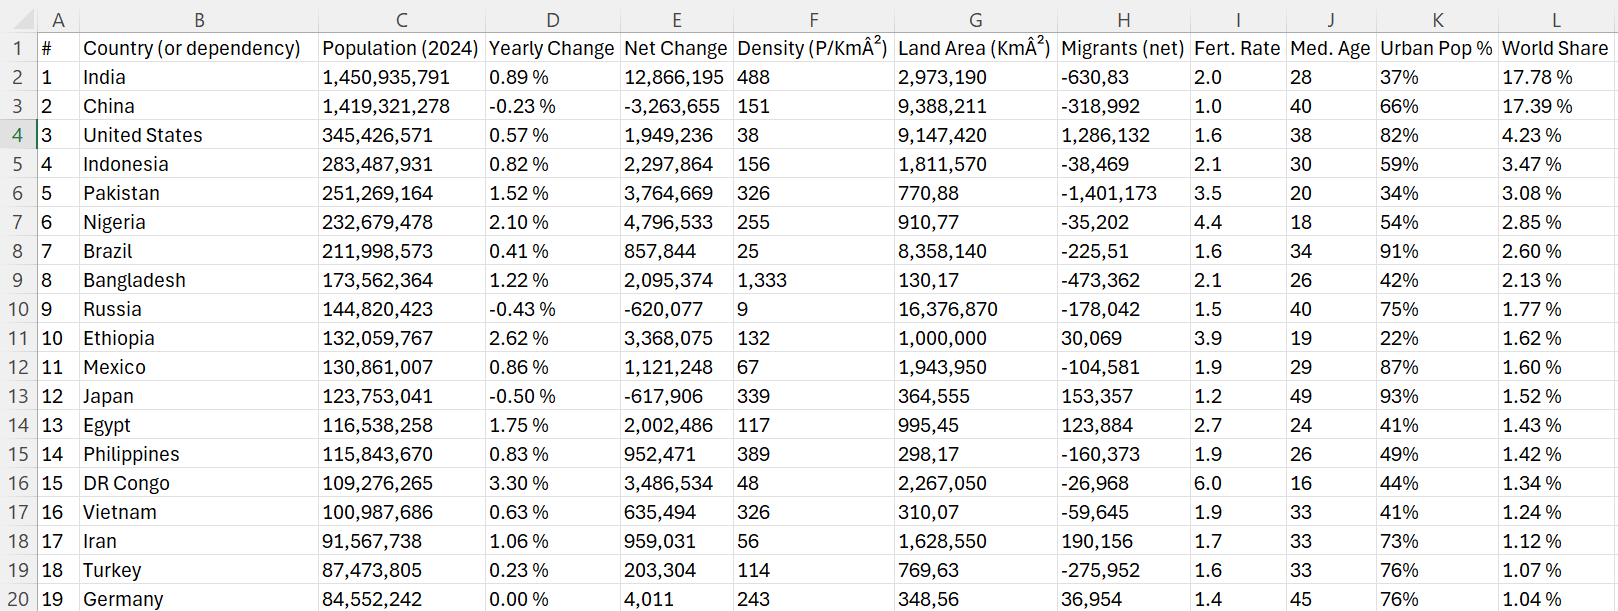